In [1]:
# !pip install skimpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from skimpy import clean_columns #Clean column names

In [3]:
df = pd.read_csv("CO2 emission by countries.csv", encoding="ISO-8859-1")
df.head(10)

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²
5,Afghanistan,AF,93,1755,0.0,41128771.0,652230.0,0.40%,63/km²
6,Afghanistan,AF,93,1756,0.0,41128771.0,652230.0,0.40%,63/km²
7,Afghanistan,AF,93,1757,0.0,41128771.0,652230.0,0.40%,63/km²
8,Afghanistan,AF,93,1758,0.0,41128771.0,652230.0,0.40%,63/km²
9,Afghanistan,AF,93,1759,0.0,41128771.0,652230.0,0.40%,63/km²


In [4]:
df.tail()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
59615,Zimbabwe,ZW,263,2016,736467042.0,16320537.0,390757.0,0.30%,42/km²
59616,Zimbabwe,ZW,263,2017,746048675.0,16320537.0,390757.0,0.30%,42/km²
59617,Zimbabwe,ZW,263,2018,757903042.0,16320537.0,390757.0,0.30%,42/km²
59618,Zimbabwe,ZW,263,2019,768852126.0,16320537.0,390757.0,0.30%,42/km²
59619,Zimbabwe,ZW,263,2020,779383468.0,16320537.0,390757.0,0.30%,42/km²


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [6]:
df = clean_columns(df)
df.columns.tolist()

9 column names have been cleaned

['country',
 'code',
 'calling_code',
 'year',
 'co_2_emission_tons',
 'population_2022',
 'area',
 '%_of_world',
 'density_km_2']

In [7]:
df.rename(columns= {"co_2_emission_tons":"co2_emission_tons", "%_of_world":"percentage_of_world",
                    "density_km_2":"density(km2)"}, inplace=True)

In [8]:
df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [10]:
df["percentage_of_world"] = df["percentage_of_world"].str.replace("%", "", regex=True)
df["percentage_of_world"] = df["percentage_of_world"].astype(float)

df["density(km2)"] = df["density(km2)"].str.replace("/km²", "", regex=True)
df["density(km2)"] = df["density(km2)"].str.replace(",", ".", regex= True)
df["density(km2)"] =  df["density(km2)"].astype(float)

In [11]:
df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.4,63.0


C:\Users\Arhamsoft\AppData\Local\Temp\ipykernel_7256\1108845454.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_world_emission_df = df.groupby("year").sum()


Text(0.5, 1.0, 'World Yearly CO2 Emission')

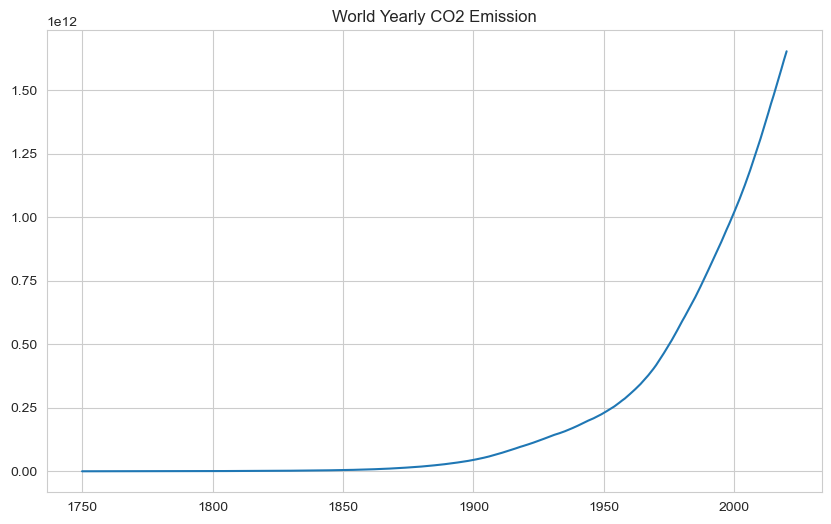

In [13]:
yearly_world_emission_df = df.groupby("year").sum()
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(yearly_world_emission_df.index, yearly_world_emission_df["co2_emission_tons"])
plt.title("World Yearly CO2 Emission")

In [15]:
top20_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"], ascending=False).head(20) 

Text(0, 0.5, 'Countries')

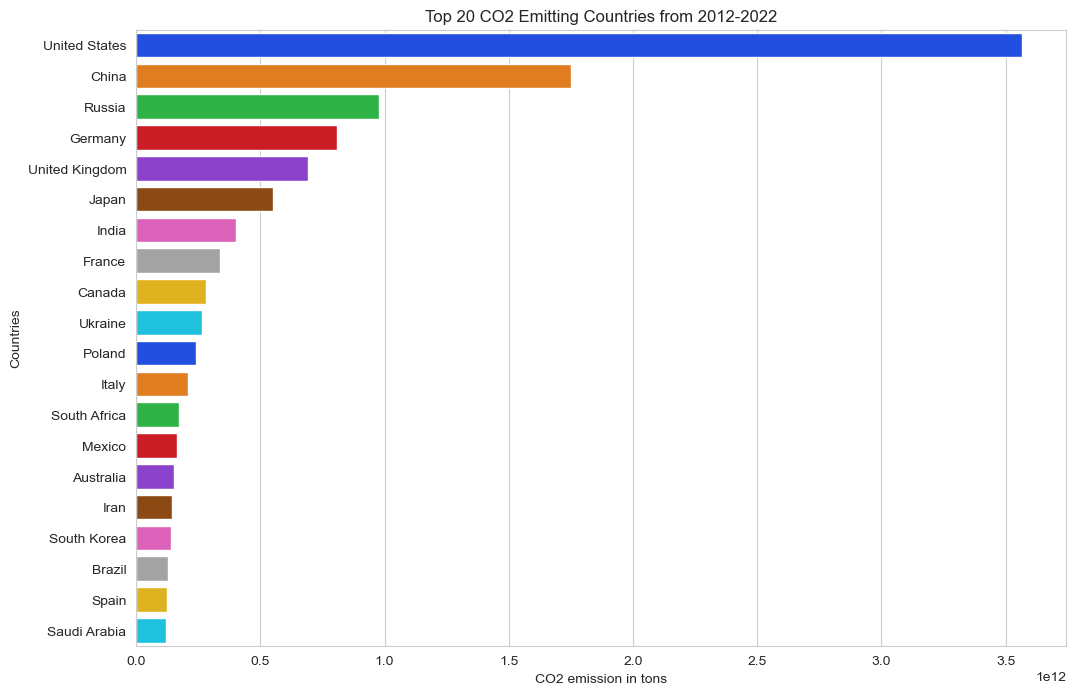

In [16]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data= top20_emission_df, x="co2_emission_tons", y=top20_emission_df.index, palette="bright")
plt.title("Top 20 CO2 Emitting Countries from 2012-2022")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries")

In [18]:
# getting world emission for last 10 years and saving to a new dataframe

last_decade_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"])

In [19]:
# Finding the top 20 countries with least emission of CO2

bottom20_emission_df = df[(df.year > 2011) & (df["year"] < 2023)].groupby("country")[["co2_emission_tons"]].sum().sort_values(by=["co2_emission_tons"]).head(20)

Text(0, 0.5, 'Countries')

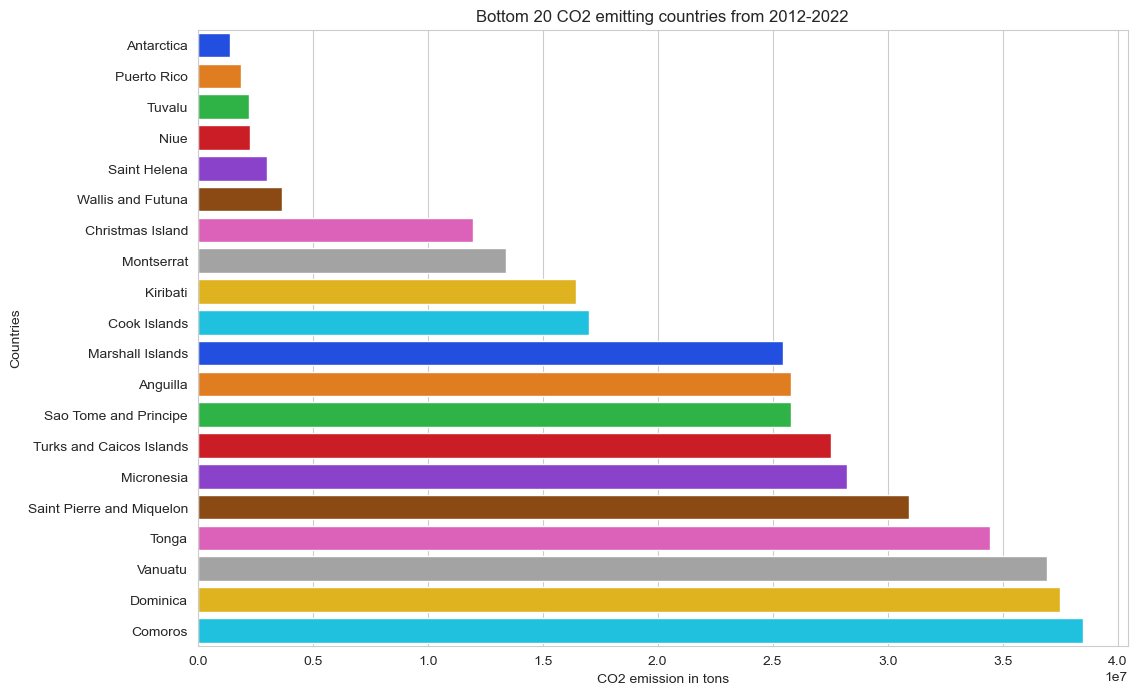

In [20]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(bottom20_emission_df, x="co2_emission_tons", y=bottom20_emission_df.index, palette="bright")
plt.title("Bottom 20 CO2 emitting countries from 2012-2022")
plt.xlabel("CO2 emission in tons")
plt.ylabel("Countries")

In [21]:
# year with greatest emission of CO2 from 1750-2020

print(df.groupby("year")[["co2_emission_tons"]].sum().sort_values(by="co2_emission_tons", ascending=False).head(1))

      co2_emission_tons
year                   
2020       1.654088e+12


In [22]:
pakistan_co2_df = df[df["country"] == "Pakistan"]

In [23]:
pakistan_co2_df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
40379,Pakistan,PK,92,1750,0.0,235824862.0,881912.0,0.5,267.0
40380,Pakistan,PK,92,1751,0.0,235824862.0,881912.0,0.5,267.0
40381,Pakistan,PK,92,1752,0.0,235824862.0,881912.0,0.5,267.0
40382,Pakistan,PK,92,1753,0.0,235824862.0,881912.0,0.5,267.0
40383,Pakistan,PK,92,1754,0.0,235824862.0,881912.0,0.5,267.0


Text(0.5, 1.0, 'Yealry CO2 emission in Pakistan')

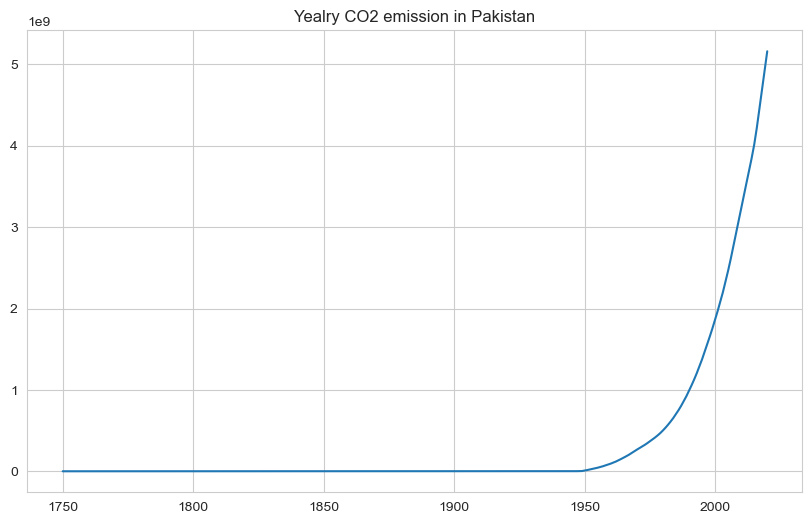

In [24]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(pakistan_co2_df["year"], pakistan_co2_df["co2_emission_tons"])
plt.title("Yealry CO2 emission in Pakistan")

In [27]:
# Percentage of CO2 top 5 countries emit in 2020

percent_top5 = df[df["year"] == 2020].sort_values("co2_emission_tons", ascending = False).head(5)["co2_emission_tons"].sum()/df[df["year"] == 2020]["co2_emission_tons"].sum()
percent_top5 = percent_top5 * 100
print(percent_top5, "%")

56.75616513903374 %


In [33]:
# How much of the world population produced 57% of emission in 2020

percent_population_emit = df[df["year"] == 2020].sort_values("co2_emission_tons", ascending = False).head(5)["population_2022"].sum()/df[df["year"] == 2020]["population_2022"].sum()
percent_population_emit = percent_population_emit * 100
print(percent_population_emit, "%")

26.323504999824003 %


In [34]:
# CO2 produced per person in USA in 2020

us_2020 = df[(df["year"] == 2020) & (df["country"] == "United States") ]
us_2020.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
57180,United States,US,1,2020,4.170000e+11,338289857.0,9372610.0,6.1,36.0


In [56]:
person_us_emit = us_2020["co2_emission_tons"] / us_2020["population_2022"]
person_us_emit = (list(person_us_emit)[0]) /100
print("Averageperson emits about ", person_us_emit, "kg of CO2 in 2020")

Averageperson emits about  12.326707152795302 kg of CO2 in 2020


In [57]:
# TIme series of emisssion for top 5 countires

top5_df = df[(df["country"] == "United States") | (df["country"] == "China") | (df["country"] == "Russia") | (df["country"] == "Germany") | (df["country"] == "United Kingdom")]
top5_df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
10569,China,CN,86,1750,0.0,1.425887e+09,9706961.0,6.3,147.0
10570,China,CN,86,1751,0.0,1.425887e+09,9706961.0,6.3,147.0
10571,China,CN,86,1752,0.0,1.425887e+09,9706961.0,6.3,147.0
10572,China,CN,86,1753,0.0,1.425887e+09,9706961.0,6.3,147.0
10573,China,CN,86,1754,0.0,1.425887e+09,9706961.0,6.3,147.0


Text(34.44788541666667, 0.5, 'CO2 emission in tons')

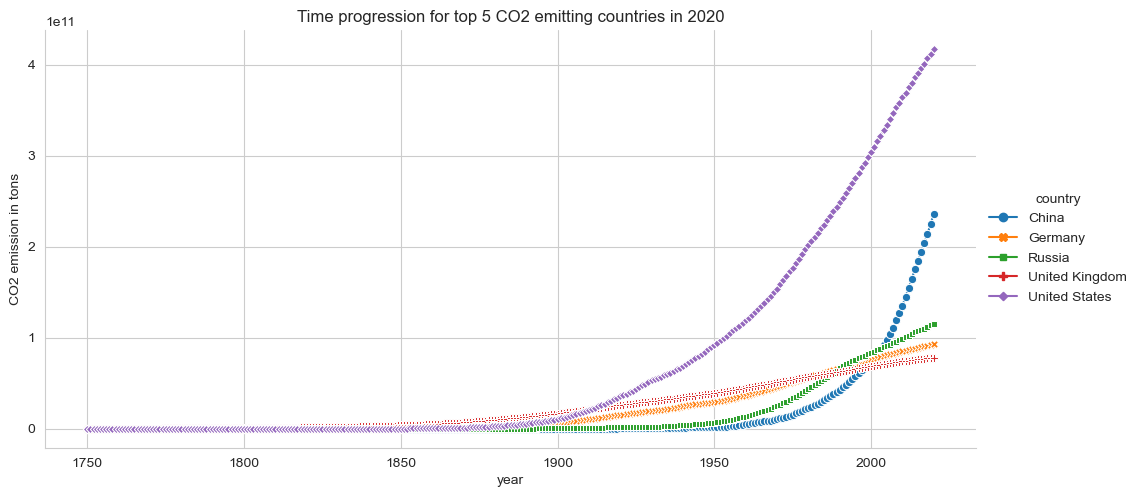

In [70]:
sns.relplot(x = "year", y = "co2_emission_tons", data= top5_df, hue="country", kind="line", markers = True, dashes = False,
           height = 5, aspect = 2, style = "country")
plt.title("Time progression for top 5 CO2 emitting countries in 2020")
plt.ylabel("CO2 emission in tons")

Text(0, 0.5, 'co2 emission in tons')

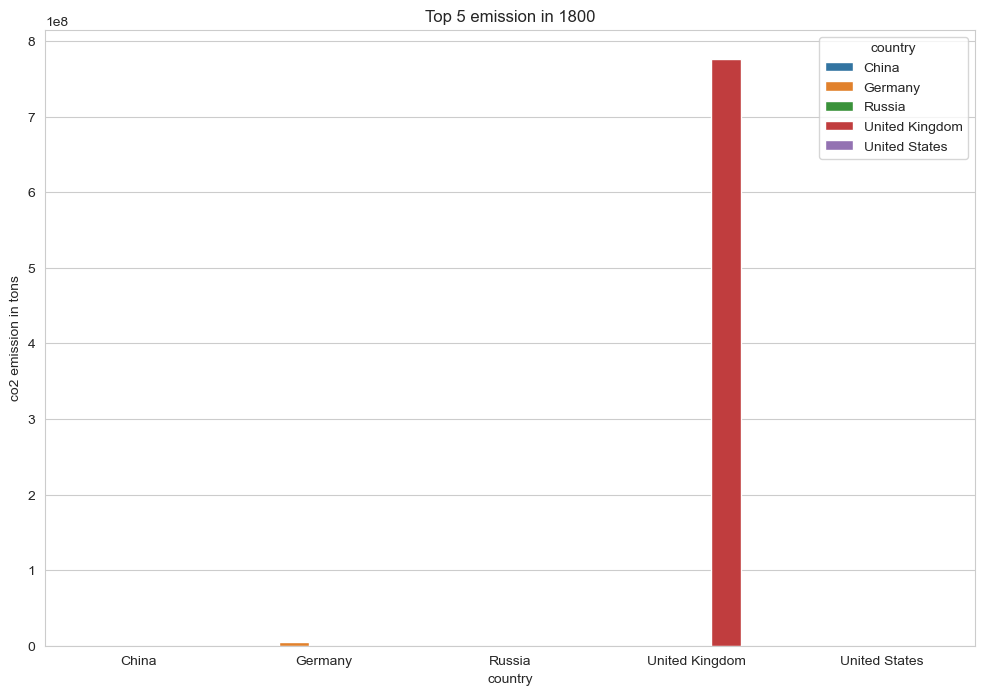

In [71]:
top5_df[top5_df["year"] == 1800]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data= top5_df[top5_df["year"] == 1800], x="country", y="co2_emission_tons", hue= "country")
plt.title("Top 5 emission in 1800")
plt.ylabel("co2 emission in tons")

Text(0, 0.5, 'co2 emission in tons')

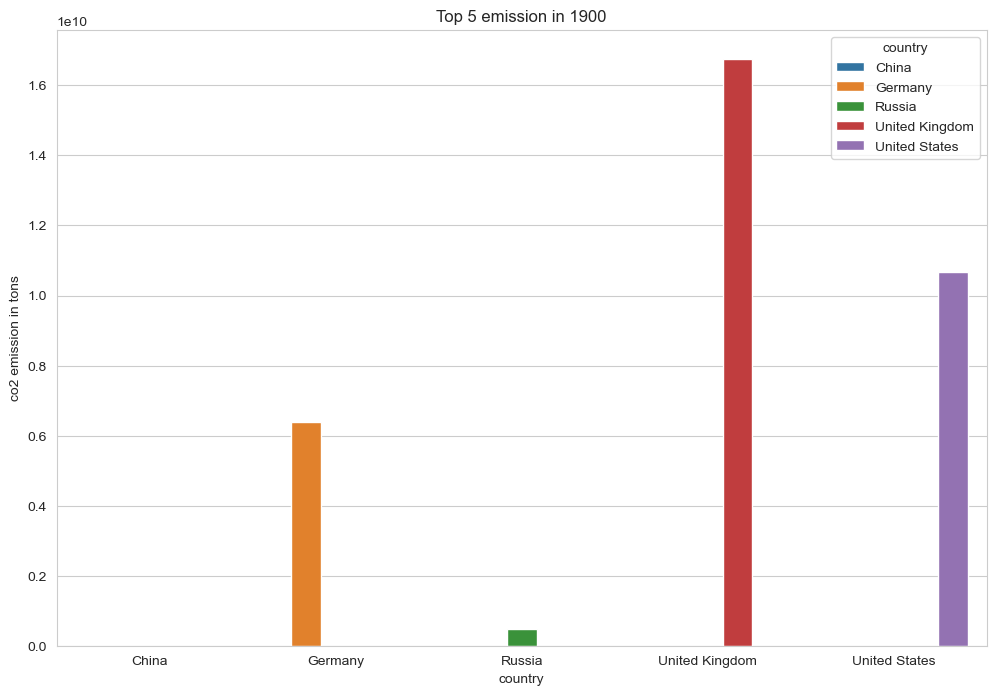

In [72]:
top5_df[top5_df["year"] == 1900]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data= top5_df[top5_df["year"] == 1900], x="country", y="co2_emission_tons", hue= "country")
plt.title("Top 5 emission in 1900")
plt.ylabel("co2 emission in tons")

Text(0, 0.5, 'co2 emission in tons')

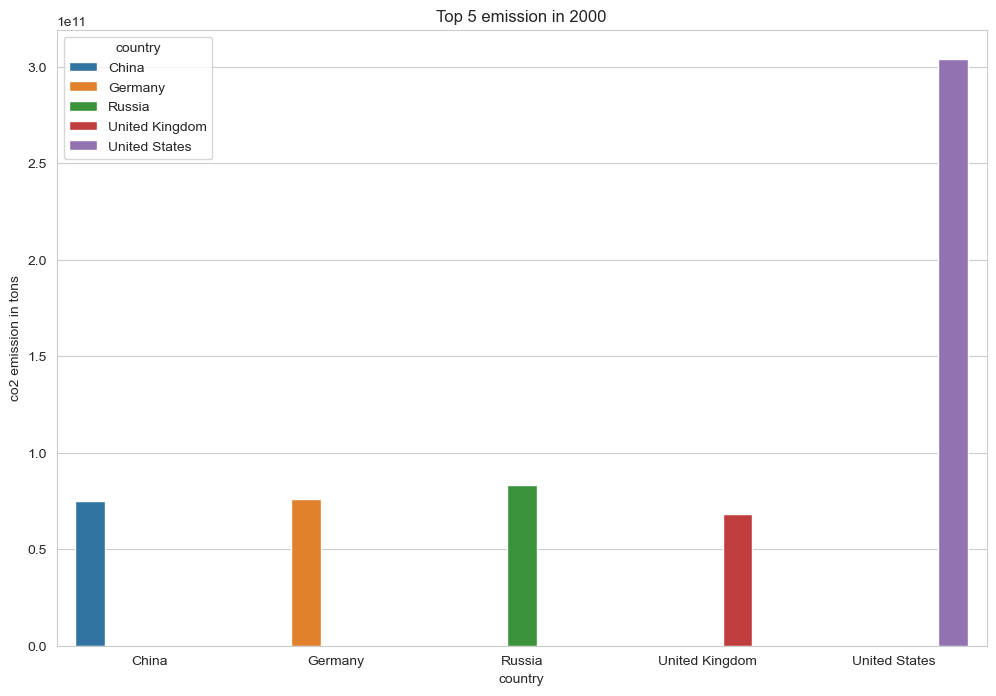

In [73]:
top5_df[top5_df["year"] == 2000]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data= top5_df[top5_df["year"] == 2000], x="country", y="co2_emission_tons", hue= "country")
plt.title("Top 5 emission in 2000")
plt.ylabel("co2 emission in tons")

Text(0, 0.5, 'co2 emission in tons')

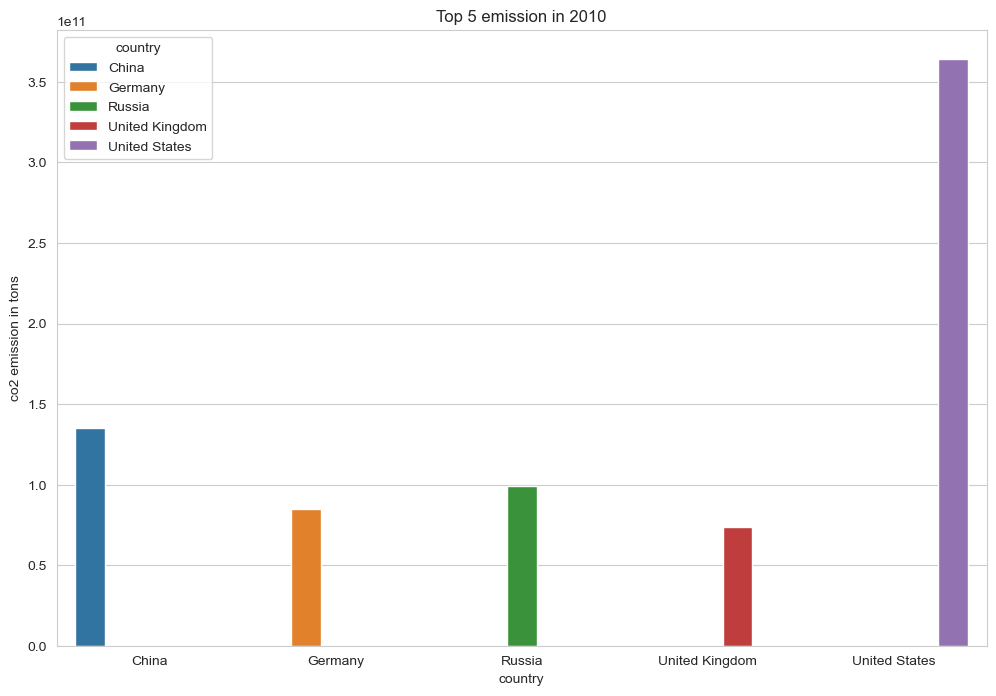

In [74]:
top5_df[top5_df["year"] == 2010]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data= top5_df[top5_df["year"] == 2010], x="country", y="co2_emission_tons", hue= "country")
plt.title("Top 5 emission in 2010")
plt.ylabel("co2 emission in tons")

Text(0, 0.5, 'co2 emission in tons')

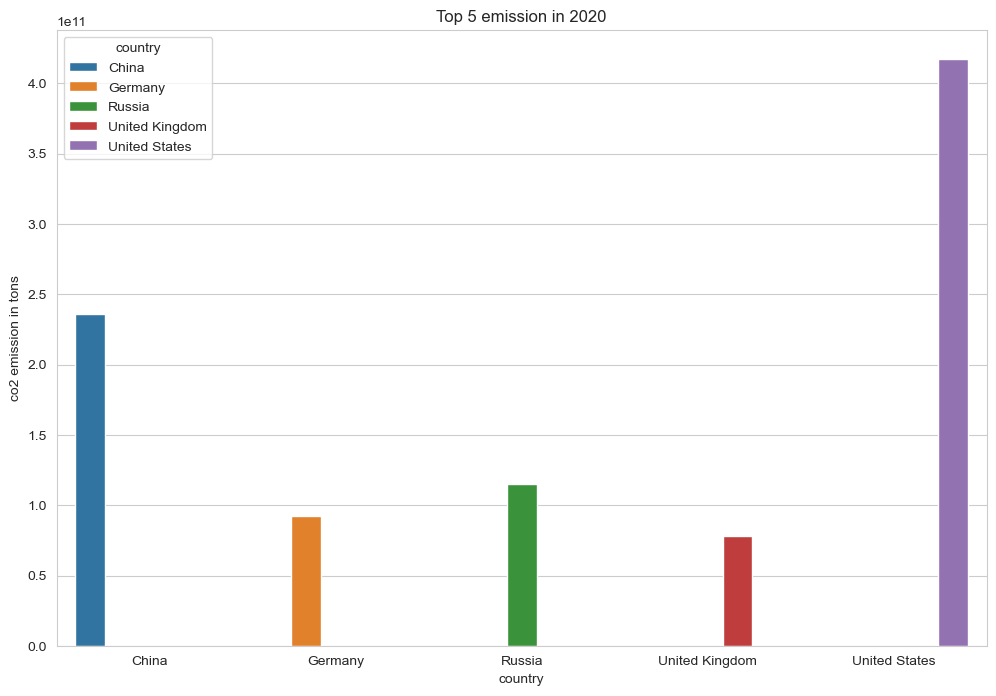

In [75]:
top5_df[top5_df["year"] == 2020]
fig = plt.figure(figsize=(12, 8))
sns.barplot(data= top5_df[top5_df["year"] == 2020], x="country", y="co2_emission_tons", hue= "country")
plt.title("Top 5 emission in 2020")
plt.ylabel("co2 emission in tons")

In [76]:
df.head()

,country,code,calling_code,year,co2_emission_tons,population_2022,area,percentage_of_world,density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.4,63.0
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.4,63.0
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.4,63.0
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.4,63.0
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.4,63.0


In [77]:
co2_bar_race_df = df[["country", "year", "co2_emission_tons"]]

In [79]:
co2_barchart_race_df = co2_bar_race_df.pivot_table(values="co2_emission_tons", index="year", columns="country")

In [80]:
co2_barchart_race_df


country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1750,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1751,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1752,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1753,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
1754,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,153337133.0,266068688.0,3.949072e+09,13142768.0,583779183.0,2872576.0,153888.0,19620720.0,7.737765e+09,360554642.0,...,3.960000e+11,346071339.0,5.861481e+09,4074368.0,7.389195e+09,3.043690e+09,403040.0,584930708.0,220537335.0,736467042.0
2017,160196958.0,271370496.0,4.104008e+09,13608096.0,612199542.0,3015472.0,153888.0,20111696.0,7.925570e+09,366091231.0,...,4.010000e+11,352233912.0,5.968634e+09,4213600.0,7.550730e+09,3.238939e+09,428688.0,594881688.0,227054575.0,746048675.0
2018,168541787.0,276104384.0,4.265494e+09,14102736.0,636575343.0,3158368.0,153888.0,20610000.0,8.106669e+09,371917017.0,...,4.070000e+11,358804882.0,6.083366e+09,4389472.0,7.670907e+09,3.462657e+09,454336.0,604865435.0,234367688.0,757903042.0


In [81]:
!pip install bar-chart-race

     ------------------------------------ 156.8/156.8 kB 783.9 kB/s eta 0:00:00


In [82]:
import bar_chart_race as bcr
plt.bar

In [90]:
bcr.bar_chart_race(df= co2_barchart_race_df,
                    n_bars= 10,
                   sort='desc',
                   title='CO2 emission by countries from 1750-2020',
                   filename = 'countries_co2.mp4'
                  )

C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 127 () missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(io.BytesIO())
C:\Users\Arhamsoft\.conda\envs\env\lib\site-packages\bar_chart_race\_make_char

Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            unknown file extension: .mp4
                            

AttributeError: Rectangle.set() got an unexpected keyword argument 'item_column'

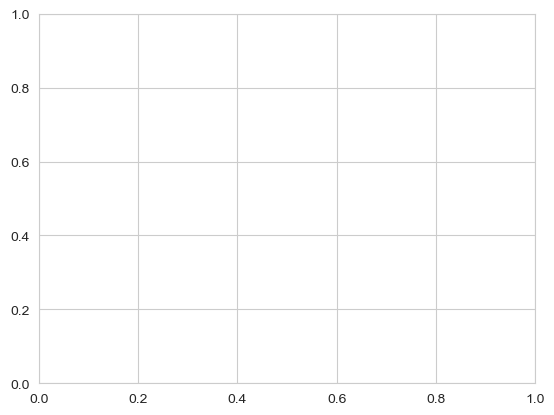

In [88]:
# race_plt=sns.barplot(df[df['country']],item_column='country', value_column='co2_emission_tons',time_column='year', top_entries=10)

# race_plt.plot(title='CO2 Emission Race by Countries (Since 1750 to 2020)', value_label='Value',item_label='Top 10 Countries')